Before starting this notebook up, please do the following so that everything functions well: 
1. Install a virtual env by running the following in the command line:
``` Python
python -m venv venv
```

2. Install packages using pip via command line:
``` Python
pip install -r requirements.txt
```

In [1]:
import requests
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import product
from tqdm import tqdm
import pyarrow
import plotly
import plotly.express as px
import geopandas as gpd

In [2]:
def extract_nd_monthlies(choose_year: int, choose_month: int):
    """
    Given a year and month, extract and save MPR dataset
    Args: Month and Year lists
    Output: datframe with selected datasets months
    """
    # make sure that month is ##
    url = f"https://www.dmr.nd.gov/oilgas/mpr/{choose_year}_{choose_month:02d}.xlsx"

    response = requests.get(url=url)
    dataframe = pd.read_excel(response.content, header=0)

    # setting up process to store data
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data/monthlies"
    os.makedirs(save_path, exist_ok=True)
    dataframe.to_excel(f"{save_path}/{choose_year}_{choose_month}.xlsx", index=False)

    return dataframe


In [3]:
def extract_mpr(start_yr: int = 2003, end_yr: int = 2026):
    """
    Function that tries to grab datasets and update master dataset 
    """
    datasets = []

    choose_years = list(range(start_yr, end_yr))
    choose_months = list(range(1, 13))
    date_permus = list(product(choose_years, choose_months))

    for date_permu in tqdm(date_permus): 
        try:
            temp_df = extract_nd_monthlies(choose_year=date_permu[0], choose_month=date_permu[1])
            datasets.append(temp_df)

        except:
            print(f"no data exists for {date_permu[0]}_{date_permu[1]}!")

    # now we want to combine all datasets into one master df
    master_df = pd.concat(datasets)

    # setting up where we wil be storing this dataset
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data"
    os.makedirs(save_path, exist_ok=True)
    master_df.to_excel(f"{save_path}/full_data_{start_yr}_{end_yr}.xlsx", index=False)
    master_df = master_df.reset_index()

    return master_df



In [4]:
test_df = extract_mpr(start_yr=2023)

  0%|          | 0/36 [00:00<?, ?it/s]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_47844/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
  3%|▎         | 1/36 [00:05<03:02,  5.22s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_47844/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
  6%|▌         | 2/36 [00:09<02:33,  4.51s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_47844/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(respons

no data exists for 2025_5!
no data exists for 2025_6!


 89%|████████▉ | 32/36 [02:02<00:04,  1.16s/it]

no data exists for 2025_7!
no data exists for 2025_8!


 94%|█████████▍| 34/36 [02:02<00:01,  1.51it/s]

no data exists for 2025_9!
no data exists for 2025_10!


100%|██████████| 36/36 [02:03<00:00,  3.43s/it]

no data exists for 2025_11!
no data exists for 2025_12!


We have successfully create extraction functions in two parts
- Single Extraction function given a month and year
- Multiple Extraction function given a start and end year

Let's visualize our data and create some visualizing functions!

In [5]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582612 entries, 0 to 582611
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       582612 non-null  int64         
 1   ReportDate  582612 non-null  datetime64[ns]
 2   API_WELLNO  582612 non-null  int64         
 3   FileNo      582612 non-null  int64         
 4   Company     582612 non-null  object        
 5   WellName    582612 non-null  object        
 6   Quarter     582594 non-null  object        
 7   Section     582612 non-null  int64         
 8   Township    582612 non-null  int64         
 9   Range       582612 non-null  int64         
 10  County      582612 non-null  object        
 11  FieldName   582612 non-null  object        
 12  Pool        582612 non-null  object        
 13  Oil         578859 non-null  float64       
 14  Wtr         578859 non-null  float64       
 15  Days        578859 non-null  float64       
 16  Ru

In [6]:
print(test_df.head(10))

   index ReportDate      API_WELLNO  FileNo                      Company  \
0      0 2023-01-01  33053039010000   22023  GRAYSON MILL OPERATING, LLC   
1      1 2023-01-01  33053038990000   22021  GRAYSON MILL OPERATING, LLC   
2      2 2023-01-01  33053048330000   25091  GRAYSON MILL OPERATING, LLC   
3      3 2023-01-01  33053050010000   25645  GRAYSON MILL OPERATING, LLC   
4      4 2023-01-01  33053048340000   25092  GRAYSON MILL OPERATING, LLC   
5      5 2023-01-01  33053050000000   25644  GRAYSON MILL OPERATING, LLC   
6      6 2023-01-01  33053076280000   32709  GRAYSON MILL OPERATING, LLC   
7      7 2023-01-01  33053042390000   23319  GRAYSON MILL OPERATING, LLC   
8      8 2023-01-01  33053042400000   23320  GRAYSON MILL OPERATING, LLC   
9      9 2023-01-01  33053042380000   23302  GRAYSON MILL OPERATING, LLC   

                  WellName Quarter  Section  Township  Range  ...    Pool  \
0            BILL 14-23 1H    SWSW       11       151    101  ...  BAKKEN   
1        

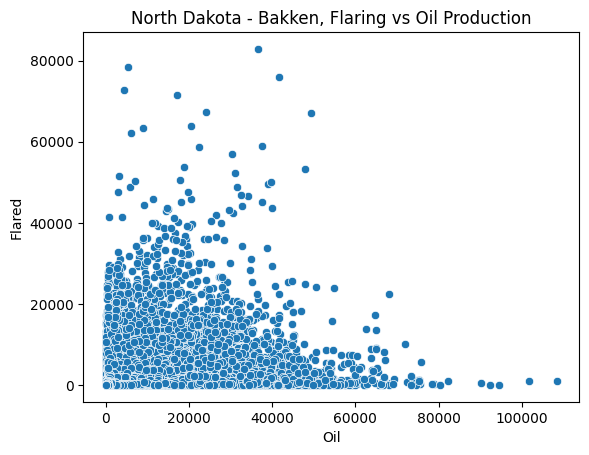

In [7]:
plt.figure()
sns.scatterplot(data=test_df, x="Oil", y="Flared")
plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()

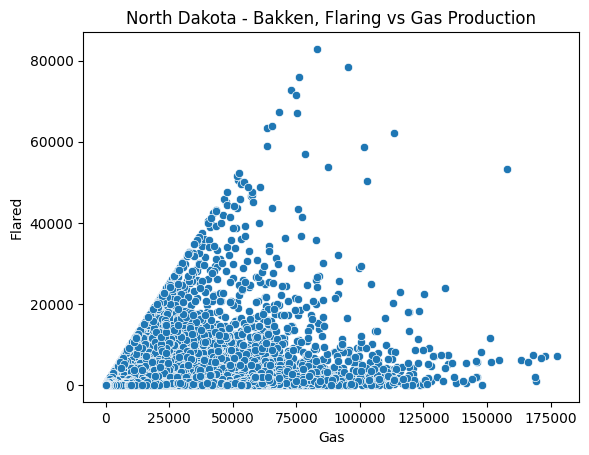

In [8]:
plt.figure()
sns.scatterplot(data=test_df, x="Gas", y="Flared")
plt.title("North Dakota - Bakken, Flaring vs Gas Production")
plt.show()

After some visuals we have some direction! 
Let's now create a transformation function that can add a few columns with calculations we may want
One thing to note, we will be converting our dataset into a polars dataframe to ensure that we can apply functions in parallel (cols, etc.)

In [9]:
def transform_mpr(dataframe: object):
    """
    Given a dataframe, transform as necessary for additional metrics
    Args; DataFrame
    Output: Upgraded DataFrame (8!)
    """
    try: 
        pl_df = pl.from_pandas(dataframe)
    except: 
        print("Polars Dataframe already provided, gracias!")
        pl_df = dataframe

    # we want to calculate 
    pl_df = pl_df.with_columns(
        water_cut = pl.col("Wtr") / (pl.col("Wtr") + pl.col("Oil")), 
        flare_intensity = pl.col("Flared") / pl.col("Gas"), 
        gas_util_efficiency = pl.col("GasSold") / pl.col("Gas")
    )

    return pl_df

In [10]:
test_tdf = transform_mpr(dataframe=test_df)
print(test_tdf.describe())

shape: (9, 26)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ index     ┆ ReportDat ┆ API_WELLN ┆ … ┆ Long      ┆ water_cut ┆ flare_int ┆ gas_util │
│ ---       ┆ ---       ┆ e         ┆ O         ┆   ┆ ---       ┆ ---       ┆ ensity    ┆ _efficie │
│ str       ┆ f64       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ncy      │
│           ┆           ┆ str       ┆ f64       ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 582612.0  ┆ 582612    ┆ 582612.0  ┆ … ┆ 582612.0  ┆ 578859.0  ┆ 578859.0  ┆ 578859.0 │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0.0       ┆ … ┆ 0.0       ┆ 3753.0    ┆ 3753.0    ┆ 3753.0   │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           

In [25]:
test_tdf.head()

index,ReportDate,API_WELLNO,FileNo,Company,WellName,Quarter,Section,Township,Range,County,FieldName,Pool,Oil,Wtr,Days,Runs,Gas,GasSold,Flared,Lat,Long,water_cut,flare_intensity,gas_util_efficiency
i64,datetime[ns],i64,i64,str,str,str,i64,i64,i64,str,str,str,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64
0,2023-01-01 00:00:00,33053039010000,22023,"""GRAYSON MILL OPERATING, LLC""","""BILL 14-23 1H""","""SWSW""",11,151,101,"""MCK""","""ALEXANDER""","""BAKKEN""",593.0,1068.0,31.0,562,4545.0,4421,0.0,47.907508,-103.580354,0.642986,0.0,0.972717
1,2023-01-01 00:00:00,33053038990000,22021,"""GRAYSON MILL OPERATING, LLC""","""BILL 14-23 2TFH""","""SWSW""",11,151,101,"""MCK""","""ALEXANDER""","""BAKKEN""",769.0,1267.0,31.0,733,1231.0,1094,13.0,47.90745,-103.580411,0.622299,0.010561,0.888708
2,2023-01-01 00:00:00,33053048330000,25091,"""GRAYSON MILL OPERATING, LLC""","""BILL 14-23 3H""","""NWNE""",14,151,101,"""MCK""","""ALEXANDER""","""BAKKEN""",757.0,3417.0,31.0,797,8762.0,8570,112.0,47.904582,-103.569664,0.818639,0.012782,0.978087
3,2023-01-01 00:00:00,33053050010000,25645,"""GRAYSON MILL OPERATING, LLC""","""BILL 14-23 4TFH""","""NWNE""",14,151,101,"""MCK""","""ALEXANDER""","""BAKKEN""",547.0,4305.0,31.0,524,1854.0,1813,24.0,47.904582,-103.569541,0.887263,0.012945,0.977886
4,2023-01-01 00:00:00,33053048340000,25092,"""GRAYSON MILL OPERATING, LLC""","""BILL 14-23 5TFH""","""NWNE""",14,151,101,"""MCK""","""ALEXANDER""","""BAKKEN""",342.0,3714.0,31.0,360,1305.0,1276,17.0,47.904582,-103.569786,0.91568,0.013027,0.977778


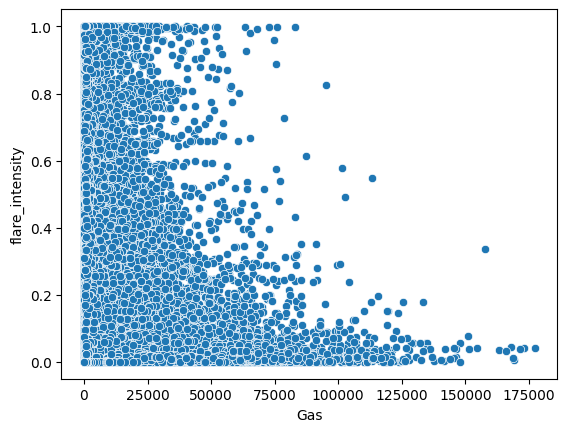

In [11]:
plt.figure()
sns.scatterplot(data=test_tdf, x="Gas", y="flare_intensity")
plt.show()

let's now set up a county map to calculate some cool geo insights!

<Axes: >

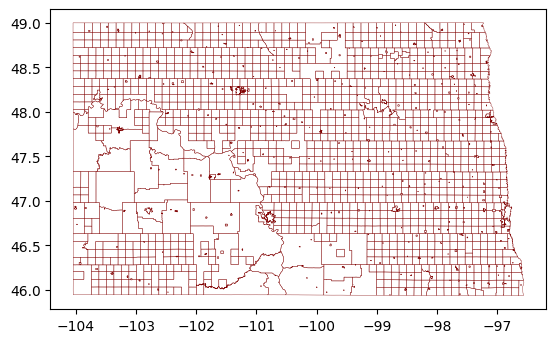

In [23]:
# loading in our map data
nd_map = gpd.read_file("mapping_data/north_dakota_county.geojson")
nd_map.plot(facecolor="none", edgecolor="maroon", linewidth=0.25)


In [32]:
nd_map.head(5)


,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,38,019,17580,01759354,0600000US3801917580,3801917580,Cypress,44,115004545,113810,"MULTIPOLYGON (((-99.00026 48.94255, -99.00026 ..."
1,38,001,37740,01037221,0600000US3800137740,3800137740,Hettinger,44,90357263,571245,"MULTIPOLYGON (((-102.74636 46.03191, -102.7308..."
2,38,061,22500,01036936,0600000US3806122500,3806122500,Egan,44,88066086,6603076,"MULTIPOLYGON (((-102.05175 48.37235, -101.9875..."
3,38,001,10300,01035945,0600000US3800110300,3800110300,Bucyrus,25,906162,0,"MULTIPOLYGON (((-102.7956 46.06822, -102.79246..."
4,38,063,26220,01036563,0600000US3806326220,3806326220,Field,44,92908321,221723,"MULTIPOLYGON (((-98.13977 47.84049, -98.13965 ..."


In [30]:
# we are loading in a list of county symbols to county names
county_labels = pd.read_csv("mapping_data/county_labels.csv")
print(county_labels)

   county_symbol         county
0            MCK       McKenzie
1            DIV         Divide
2            MTL      Mountrail
3            WIL       Williams
4            BOW         Bowman
5            BOT      Bottineau
6            BIL       Billings
7            DUN           Dunn
8            BRK          Burke
9             GV  Golden Valley
10           STK          Stark
11           SLP          Slope
12           REN       Renville
13           MCL         McLean
14           WRD           Ward
15           MCH        McHenry
